<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Average-Star-Ratings" data-toc-modified-id="Average-Star-Ratings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Average Star Ratings</a></span></li><li><span><a href="#Review-Length-and-Star-Ratings" data-toc-modified-id="Review-Length-and-Star-Ratings-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Review Length and Star Ratings</a></span></li><li><span><a href="#Cities-in-the-Dataset" data-toc-modified-id="Cities-in-the-Dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cities in the Dataset</a></span><ul class="toc-item"><li><span><a href="#Calculating-the-Sparsity-Matrix-for-each-city" data-toc-modified-id="Calculating-the-Sparsity-Matrix-for-each-city-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Calculating the Sparsity Matrix for each city</a></span></li></ul></li><li><span><a href="#Looking-at-Restaurant-Categories" data-toc-modified-id="Looking-at-Restaurant-Categories-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Looking at Restaurant Categories</a></span></li><li><span><a href="#Individual-Restaurant-Analysis" data-toc-modified-id="Individual-Restaurant-Analysis-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Individual Restaurant Analysis</a></span><ul class="toc-item"><li><span><a href="#Looking-at-Checkins" data-toc-modified-id="Looking-at-Checkins-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Looking at Checkins</a></span></li><li><span><a href="#Timeseries" data-toc-modified-id="Timeseries-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Timeseries</a></span></li></ul></li><li><span><a href="#Users-and-their-friends" data-toc-modified-id="Users-and-their-friends-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Users and their friends</a></span></li><li><span><a href="#Tips-Dataset" data-toc-modified-id="Tips-Dataset-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Tips Dataset</a></span></li><li><span><a href="#Business-Attributes-Dataset" data-toc-modified-id="Business-Attributes-Dataset-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Business Attributes Dataset</a></span></li></ul></li></ul></div>

# EDA

In [6]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style='whitegrid')
import matplotlib.pyplot as plt
import statsmodels
import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now

In [2]:
#sets the default options for viewing pandas dataframes, not necessary to run this cell.
#Run it if you want to view more columns and/or rows
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
#pd.set_option('display.width', 100)
pd.set_option('display.max_info_columns', 50)

In [5]:
#set a path for the data folder
path = '../data/'

In [4]:
df = pd.read_csv(f'{path}/raw/restaurant_reviews.csv', parse_dates=['date'])

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#Our raw data file has all reviews for all non-fast food restaurants.
#It was pre-processed in the first notebook in the "notebook" folder.
print(f'Number of Users: {df.user_id.unique().shape[0]}')
print(f'Number of Restaurants: {df.business_id.unique().shape[0]}')
print(f'Number of Reviews: {df.text.unique().shape[0]}')

Number of Users: 888427
Number of Restaurants: 48588
Number of Reviews: 3065839


In [8]:
df.columns

Index(['user_id', 'business_id', 'rev_stars', 'date', 'text', 'useful',
       'funny', 'cool', 'bus_id', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'bus_stars',
       'review_count', 'is_open', 'categories'],
      dtype='object')

In [9]:
#this is a duplicated column left over from pre-processing, so let's drop it
df = df.drop(columns='bus_id')

In [10]:
#create a weekday column 
df['weekday'] = df.date.apply(lambda x: x.weekday())
#add a new colomn which calculates the number of characters in a given review
df['text length'] = df['text'].apply(len)
#add a year column
df['year'] = df.date.apply(lambda x: x.year)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066833 entries, 0 to 3066832
Data columns (total 23 columns):
user_id         object
business_id     object
rev_stars       int64
date            datetime64[ns]
text            object
useful          int64
funny           int64
cool            int64
name            object
neighborhood    object
address         object
city            object
state           object
postal_code     object
latitude        float64
longitude       float64
bus_stars       float64
review_count    int64
is_open         int64
categories      object
weekday         int64
text length     int64
year            int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(10)
memory usage: 538.2+ MB


In [12]:
#Check for any missing data
df.isnull().sum()

user_id               0
business_id           0
rev_stars             0
date                  0
text                  0
useful                0
funny                 0
cool                  0
name                  0
neighborhood    1461574
address               0
city                  0
state                 0
postal_code        1054
latitude              0
longitude             0
bus_stars             0
review_count          0
is_open               0
categories            0
weekday               0
text length           0
year                  0
dtype: int64

It doesn't look like we're missing any important data.

In [13]:
df.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year
0,DUfWxxewcJgGcc1Y189XSQ,ZcAoKSDT6BNcWsn3o4-WVA,2,2017-01-07,Cool place packed to the rafters. Menu is pret...,1,0,0,"""Me & Julio""",NaN,"""2784 S Fish Hatchery Rd""",Fitchburg,WI,53711,43.005728,-89.427154,3.0,102,1,Restaurants;Mexican;Tex-Mex;American (Traditio...,5,369,2017
1,oAJf-_URH4QBMs2ZMpjUyA,9VhZRkmyoEho58vmnMh_Hg,3,2016-04-11,"I've had mixed experiences at this Montana's, ...",0,0,0,"""Montana's BBQ & Bar""",NaN,"""8735 Yonge St""",Richmond Hill,ON,L4C 6Z1,43.840823,-79.428224,3.0,49,1,Comfort Food;Restaurants;American (Traditional...,0,524,2016
2,SOb8RgcqBGbwlq9LZXy3fQ,IgOaTag1zhIXndxngP0M3w,1,2016-09-21,Die Angaben hier sind leider nicht mehr ganz k...,0,0,0,"""Restaurant Ganesha""",NaN,"""Auberlenstr. 40""",Fellbach,BW,70736,48.818648,9.270925,3.0,8,1,Restaurants;Indian,2,125,2016
3,Iwe-xN6dnugdZ0KiQjO6Hg,Fvd8qeJCXFbMYQk45S7iBQ,5,2014-06-30,My family came in while waiting for our time a...,0,0,0,"""Las Fuentes Mexican Grill""",NaN,"""13621 N Litchfield Rd""",Surprise,AZ,85374,33.607472,-112.355941,3.5,151,1,Mexican;Restaurants,0,256,2014
4,VSCpdfEtjdWjTbBVKMb5eA,mF2EW3twSrFPmT_RVV1-Qg,2,2011-11-18,I would not recommend this place for Chinese f...,3,5,0,"""House of Hunan""",NaN,"""18 Public Sq""",Medina,OH,44256,41.138544,-81.864299,3.0,83,1,Restaurants;Chinese,4,992,2011


## Average Star Ratings

Let's take a look at some summary statistics in our dataset and graph how reviews and users have changed over the years.

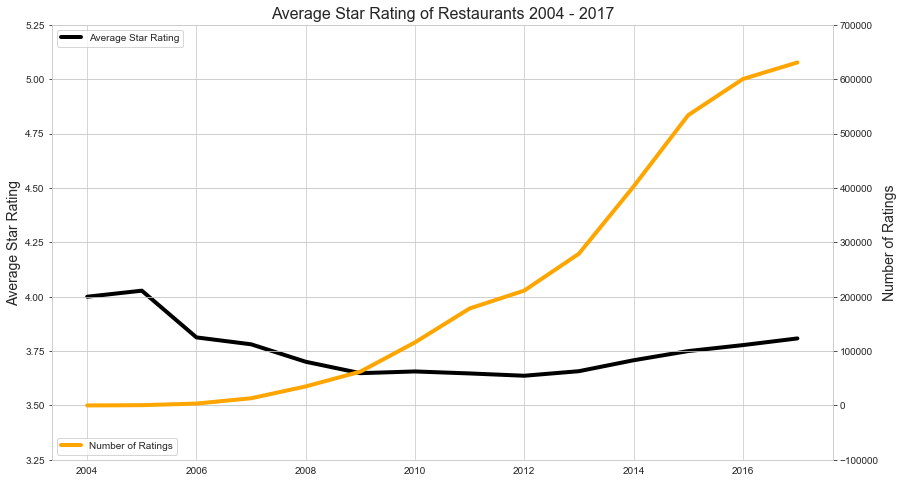

In [14]:
fig, ax = plt.subplots(figsize = (14,8))
#plt.tight_layout()

# puts the data in the figure
x1 = df.groupby(['year'])['rev_stars'].mean().keys()
x2 =  df.groupby(['year'])['rev_stars'].count().keys()

y1 = df.groupby(['year'])['rev_stars'].mean().values
y2 = df.groupby(['year'])['rev_stars'].count().values

ax = plt.subplot(111)
ax.plot(x1, y1, color='black', linewidth=4)
plt.legend(['Average Star Rating'], loc='upper left')
plt.ylim(3.25, 5.25)
plt.ylabel('Average Star Rating', fontsize=14)

ax2 = ax.twinx()
ax2.plot(x2, y2, color='orange', linewidth=4)
plt.legend(['Number of Ratings'], loc='lower left')
plt.ylim(plt.ylim(-100_000, 700_000))

plt.ylabel('Number of Ratings', fontsize=14)

plt.title('Average Star Rating of Restaurants 2004 - 2017', fontsize=16)
plt.show()
#fig.savefig('Average_Star_Ratings.png')

In [15]:
#let's create a dataframe for each restaurant and compute the average over the years
ave_reviews = pd.DataFrame(df.groupby(['year','business_id'])['rev_stars'].mean()).reset_index()

In [16]:
ave_reviews.head()

,year,business_id,rev_stars
0,2004,9X-43jnj6-6ZBuBdFm7BLA,2.0
1,2004,AtLv64FV-Pw6JuT3XUKU1g,4.0
2,2004,N2PlDjUJVfOJzsPzY0Au1w,3.0
3,2004,PD2MAlYYi9HCqPH7IBKwTg,5.0
4,2004,oYMsq2Xvzw6UbrIlMWjb-A,4.0


Text(0.5, 0, 'Year')

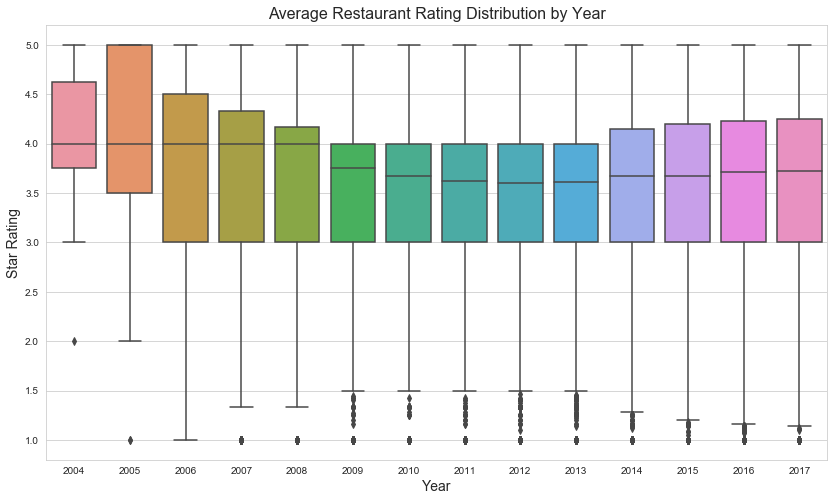

In [17]:
fig, ax = plt.subplots(figsize = (14,8))

sns.boxplot(x='year', y='rev_stars', data=ave_reviews)
plt.title('Average Restaurant Rating Distribution by Year', fontsize=16)
plt.ylabel('Star Rating', fontsize=14)
plt.xlabel('Year', fontsize=14)
#fig.savefig('Average_Star_Dist.png')

Text(0.5, 0, 'Year')

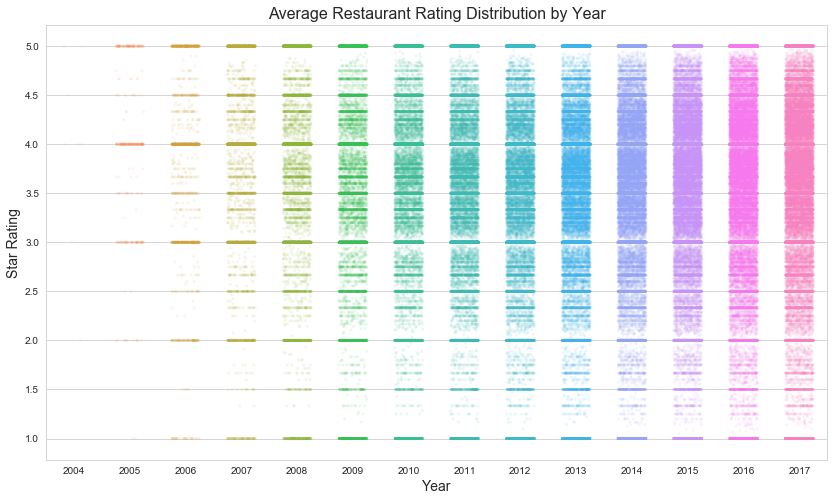

In [18]:
fig, ax = plt.subplots(figsize = (14,8))

sns.stripplot(x='year', y='rev_stars', data=ave_reviews, alpha=0.1, jitter=0.25, size=3)
plt.title('Average Restaurant Rating Distribution by Year', fontsize=16)
plt.ylabel('Star Rating', fontsize=14)
plt.xlabel('Year', fontsize=14)
#fig.savefig('Average_Star_Strip.png')

## Review Length and Star Ratings

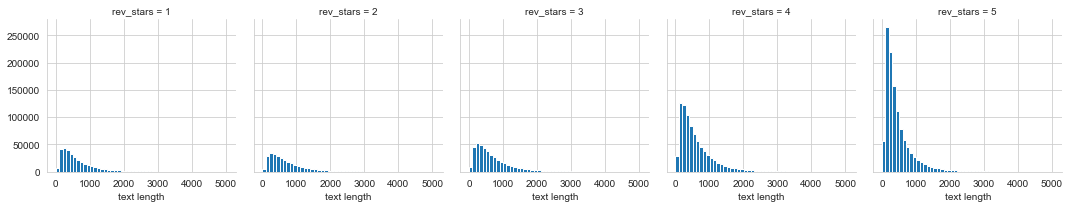

In [19]:
#distribution of reviews for each star rating
g = sns.FacetGrid(data=df, col='rev_stars')
g.map(plt.hist, 'text length', bins=50)
#fig.savefig('Text_Star_Dist.png')

Text(0.5, 0, 'Star Rating')

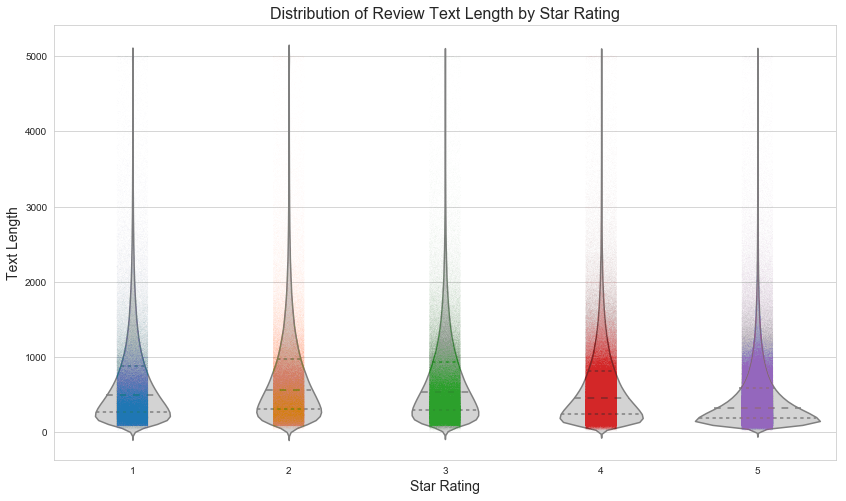

In [20]:
fig, ax = plt.subplots(figsize = (14,8))

sns.stripplot(x='rev_stars', y='text length', data=df, jitter=1, size=0.2, alpha=0.2)
sns.violinplot(x='rev_stars', y='text length', data=df, inner='quartile', color='lightgray')
plt.title('Distribution of Review Text Length by Star Rating', fontsize=16)
plt.ylabel('Text Length', fontsize=14)
plt.xlabel('Star Rating', fontsize=14)
#fig.savefig('Reviews_Star_Dist.png')

Text(0.5, 0, 'Star Rating')

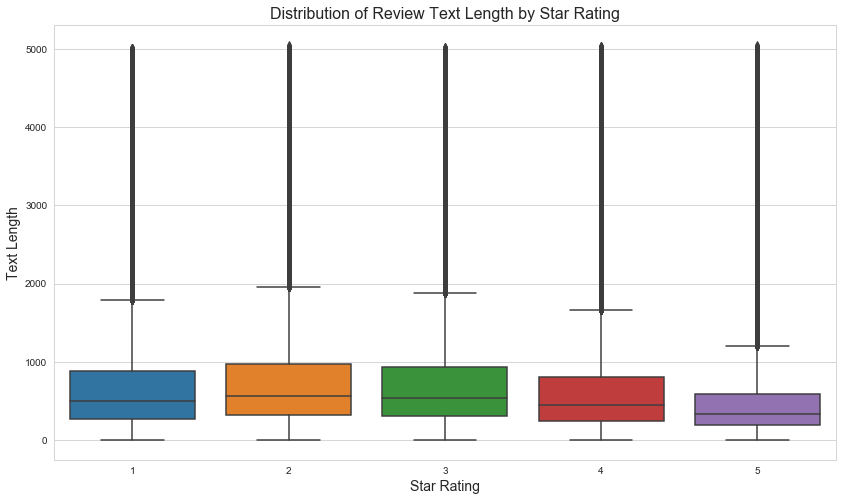

In [21]:
fig, ax = plt.subplots(figsize = (14,8))

sns.boxplot(x='rev_stars', y='text length', data=df)
plt.title('Distribution of Review Text Length by Star Rating', fontsize=16)
plt.ylabel('Text Length', fontsize=14)
plt.xlabel('Star Rating', fontsize=14)
#fig.savefig('Average_Star_Dist1.png')

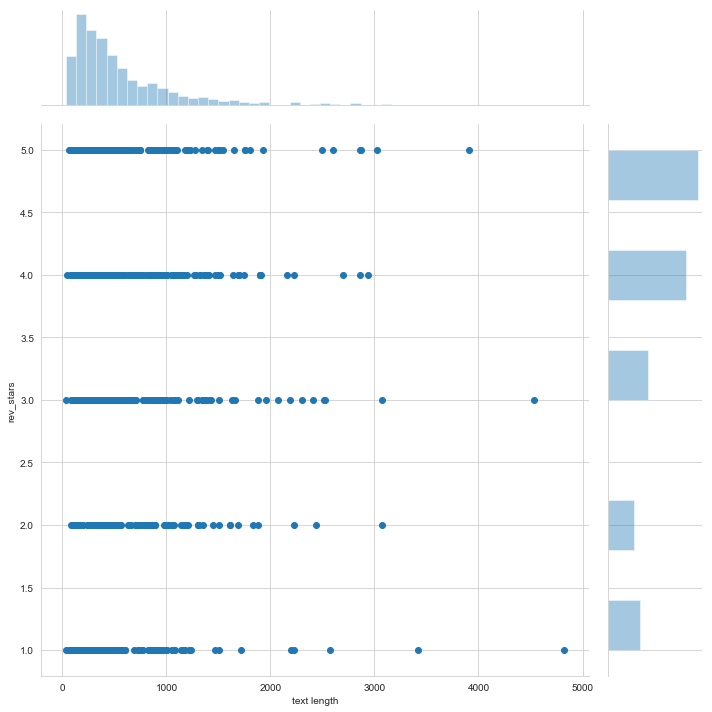

In [26]:
sns.jointplot(df['text length'][:1000], df['rev_stars'][:1000], height=10)
plt.show()


## Cities in the Dataset

Text(0.5, 0, 'Number of Reviews')

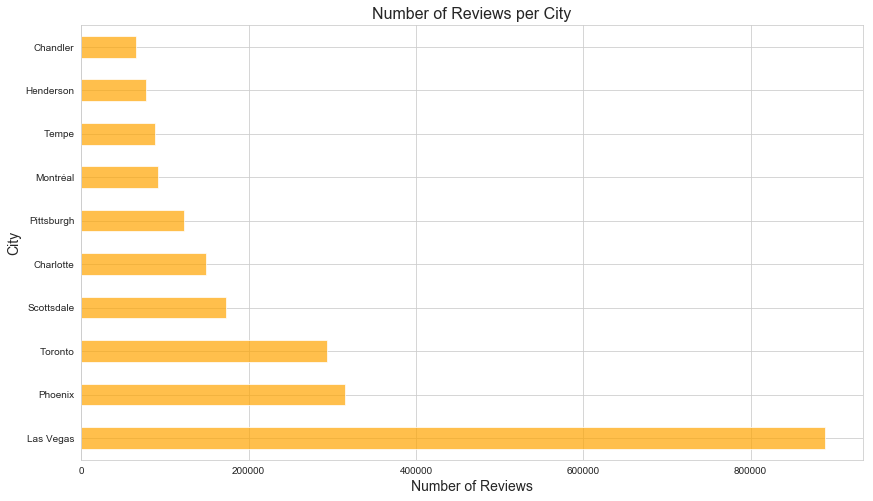

In [27]:
#which city has the most reviews?
fig, ax = plt.subplots(figsize = (14,8))

df.groupby(['city']).size().sort_values(ascending=False)[0:10].plot(kind='barh', color='orange', alpha=0.7)
plt.title('Number of Reviews per City', fontsize=16)
plt.ylabel('City', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)
#fig.savefig('Review_per_city.png')

In [28]:
#Let's create a list of 10 top 10 cities by reviews to use for our analysis
city_list = list(df.groupby(['city']).size().sort_values(ascending=False).keys()[0:10])

In [33]:
df_citycheck = df[df.city == 'Las Vegas']

In [34]:
df_citycheck.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year
172626,zZtC3Sx0wUCT0ilBKnkyHg,rZwq4LBO0p9m9zJ2zSEKNQ,5,2011-12-08,Went there last week for the first time to cel...,0,1,0,"""Elements Fine Casual Dining & Cocktails""",Spring Valley,"""4950 S Rainbow Blvd, Ste 100""",Las Vegas,NV,89118,36.098705,-115.242484,4.0,201,0,Asian Fusion;Seafood;Italian;Food;American (Ne...,3,596,2011
172627,2EGgyze89f4ire3kYzJXbw,UPIYuRaZvknINOd1w8kqRQ,4,2016-11-28,"Worth the wait, ramen and pork belly were exce...",0,0,0,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,2291,1,Restaurants;Noodles;Ramen;Japanese,0,86,2016
172628,oXmoml3HFOyNxaTtX9MvLw,lmxA0dJM0XsPCIHPXhEQ-g,5,2017-01-23,The entertainer that was there last night was ...,6,1,4,"""Sake Rok""",The Strip,"""3786 Las Vegas Blvd S""",Las Vegas,NV,89109,36.103532,-115.174914,4.0,522,1,Asian Fusion;Sushi Bars;Japanese;Restaurants;N...,0,1059,2017
172629,e6fU2rOLDXSzTpbhwhRQkg,Cni2l-VKG_pdospJ6xliXQ,3,2013-01-12,I was expecting something amazing as I am a hu...,0,0,0,"""Burger Bar""",The Strip,"""3950 S Las Vegas Blvd""",Las Vegas,NV,89109,36.094460,-115.176113,4.0,2440,1,Bars;American (Traditional);Burgers;American (...,5,368,2013
172630,HxeiKWNQhp1QD7oImwzIxw,zdE82PiD6wquvjYLyhOJNA,5,2013-09-11,"WOW. Amazing! We got takeout, bulgogi entree a...",0,0,0,"""KoMex Fusion""",NaN,"""633 N Decatur Blvd, Ste H""",Las Vegas,NV,89107,36.179939,-115.206417,4.5,1171,1,Mexican;Korean;Restaurants;Asian Fusion,2,242,2013


### Calculating the Sparsity Matrix for each city

In [30]:
cities = {}
for i in enumerate(city_list):
    dfcity = df[df.city == city_list[i[0]]]
    sparsity = (len(dfcity.user_id.unique()) /\
     (len(dfcity.business_id.unique())*len(dfcity.user_id.unique())))*100
    cities.update({i[1]:round(sparsity, 3)})

In [31]:
import operator
sorted_cities = sorted(cities.items(), key=operator.itemgetter(1), reverse=True)

In [32]:
sorted_cities

[('Henderson', 0.145),
 ('Chandler', 0.14),
 ('Tempe', 0.12),
 ('Scottsdale', 0.076),
 ('Pittsburgh', 0.049),
 ('Charlotte', 0.048),
 ('Phoenix', 0.032),
 ('Montréal', 0.031),
 ('Las Vegas', 0.02),
 ('Toronto', 0.015)]

Even though Vegas has the most reviews, it is relatively low on our list as far as a sparsity matrix goes.

## Looking at Restaurant Categories

In [34]:
#Create a new dataframe to analyze retaurant categories.
categories = pd.DataFrame(df.groupby(['business_id','categories','bus_stars']).size())
categories = categories.reset_index()
categories.head(10)

,business_id,categories,bus_stars,0
0,--6MefnULPED_I942VcFNA,Chinese;Restaurants,3.0,37
1,--9e1ONYQuAa-CB_Rrw7Tw,Cajun/Creole;Steakhouses;Restaurants,4.0,1451
2,--DaPTJW3-tB1vP-PfdTEg,Restaurants;Breakfast & Brunch,3.5,39
3,--FBCX-N37CMYDfs790Bnw,Food;American (New);Nightlife;Bars;Beer;Wine &...,3.5,108
4,--GM_ORV2cYS-h38DSaCLw,Pizza;Chicken Wings;Salad;Restaurants,4.0,7
5,--I7YYLada0tSLkORTHb5Q,Restaurants;Sports Bars;American (Traditional)...,3.5,72
6,--KCl2FvVQpvjzmZSPyviA,Restaurants;Sandwiches;Pizza,3.0,12
7,--S62v0QgkqQaVUhFnNHrw,Breakfast & Brunch;American (Traditional);Rest...,2.0,28
8,--SrzpvFLwP_YFwB_Cetow,Restaurants;Chinese,3.5,44
9,--U98MNlDym2cLn36BBPgQ,Pizza;Restaurants,3.0,4


In [35]:
#Each category is a string with a ';' used as a seporator.
#We can split the string using the split operator. 
cat_split = categories['categories'].str.split(';', expand=True)

In [36]:
#remove irrelevant categories: Restaurant, Nightlife, Food
cat_split = cat_split.replace(to_replace=['Restaurants','Nightlife','Food'], value=np.nan)

Text(0.5, 0, 'Number of Occurances')

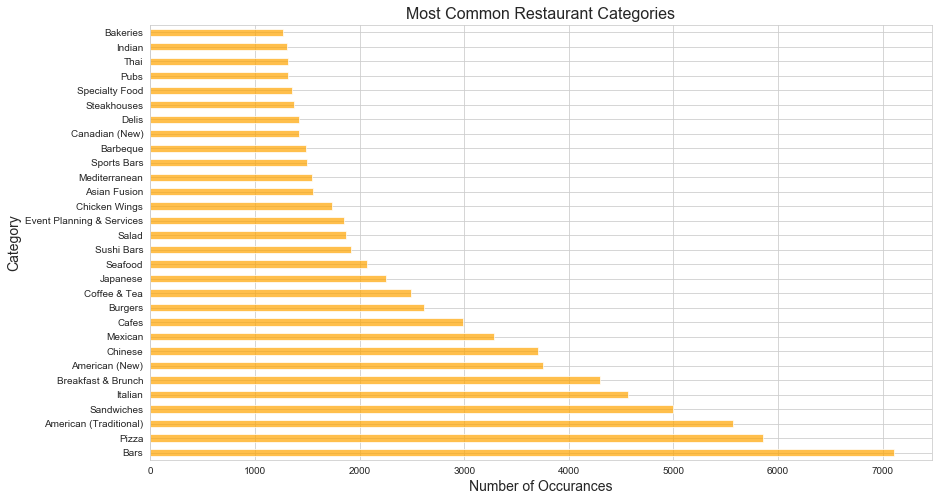

In [37]:
fig, ax = plt.subplots(figsize = (14,8))

cat_split.stack().value_counts(ascending=False)[0:30].plot(kind='barh', color='orange', alpha=0.7)
plt.title('Most Common Restaurant Categories', fontsize=16)
plt.ylabel('Category', fontsize=14)
plt.xlabel('Number of Occurances', fontsize=14)

#fig.savefig('Major_categories.png')

## Individual Restaurant Analysis

In [38]:
#let's take a look at top reviewed restaurants in our dataset
df.groupby(['business_id','name','city','rev_stars']).size().sort_values(ascending=False).head(10)

business_id             name                        city       rev_stars
4JNXUYY8wbaaDmk3BPzlWw  "Mon Ami Gabi"              Las Vegas  5            3280
RESDUcs7fIiihp38-d6_6g  "Bacchanal Buffet"          Las Vegas  5            2725
4JNXUYY8wbaaDmk3BPzlWw  "Mon Ami Gabi"              Las Vegas  4            2576
DkYS3arLOhA8si5uUEmHOw  "Earl of Sandwich"          Las Vegas  5            2443
hihud--QRriCYZw1zZvW4g  "Gangnam Asian BBQ Dining"  Las Vegas  5            2280
cYwJA2A6I12KNkm2rtXd5g  "Gordon Ramsay BurGR"       Las Vegas  5            2198
KskYqH1Bi7Z_61pH6Om8pg  "Lotus of Siam"             Las Vegas  5            2162
K7lWdNUhCbcnEvI0NhGewg  "Wicked Spoon"              Las Vegas  4            1913
RESDUcs7fIiihp38-d6_6g  "Bacchanal Buffet"          Las Vegas  4            1899
f4x1YBxkLrZg652xt2KR5g  "Hash House A Go Go"        Las Vegas  5            1888
dtype: int64

In [41]:
#Let's pick Gordon Ramsay BurGR as our single restaurant 
gordon = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g") & (df.rev_stars == 5)]

In [39]:
gordon_all = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g")]
gordon_all = gordon_all[['date','user_id','rev_stars','useful','funny','cool','text length']]
gordon_all = gordon_all.sort_index()
gordon_all.head()

,date,user_id,rev_stars,useful,funny,cool,text length
172674,2013-08-18,0YBJMg4H0SGqYZbZTxnSOg,4,0,0,0,958
172822,2015-10-23,D9FTLv0yW469_OrVMH4t-Q,5,0,0,1,86
172854,2014-02-17,ltf9Hx604T5OjJ2jJ44BBg,1,1,0,0,383
172897,2016-05-11,FsUSrlL2-W3XsxmOctc9YA,3,1,1,2,471
172961,2017-01-02,Ws70fVeBQnHOFJ-xzJoMnQ,1,0,2,0,411


([], <a list of 0 Text xticklabel objects>)

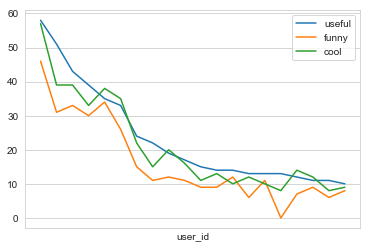

In [42]:
gordon.groupby('user_id')['useful','funny','cool'].sum().sort_values(by='useful', ascending=False)[0:20].plot()
plt.xticks([])

In [43]:
#let's sort by useful reviews with a lot of words
gordon.sort_values(by=['useful','text length'], ascending=False)[0:5]

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year
834408,m9lvZzJBlfFMQz97CyWfuw,cYwJA2A6I12KNkm2rtXd5g,5,2016-03-02,I have to choose the right place for hamburger...,58,46,57,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,2,407,2016
2996564,Gppf1W0Bk9olxs1vplhmUg,cYwJA2A6I12KNkm2rtXd5g,5,2014-11-02,Being an avid burger lover who is always in se...,51,31,39,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,6,2099,2014
228137,393M4uM_4GBLPbhQIQtF9g,cYwJA2A6I12KNkm2rtXd5g,5,2016-02-29,Gordon Ramsay didn't let me down. I had this ...,43,33,39,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,0,1518,2016
1772075,Wd4FRRD30avk-Mj6C_O2ow,cYwJA2A6I12KNkm2rtXd5g,5,2014-01-14,2014 YELP 100 CHALLENGE - 39\/100\n\nMy boyfri...,39,30,33,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,3491,2014
1127244,WGBpuJBQ1FqRTxM8J5BBHg,cYwJA2A6I12KNkm2rtXd5g,5,2015-04-21,LOVED IT!!!\n\nMisc Items: No reservations ar...,35,34,38,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,2810,2015


### Looking at Checkins

In [44]:
df_check = pd.read_csv(f'{path}/external/yelp_checkin.csv')
df_check.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [45]:
#let's isoloate Gordon Ramsay BurGR
gordon_checkin = df_check[(df_check.business_id == "cYwJA2A6I12KNkm2rtXd5g")]

In [46]:
gordon_checkin['weekday'] = pd.Categorical(gordon_checkin['weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [47]:
gordon_checkin.head()

,business_id,weekday,hour,checkins
25162,cYwJA2A6I12KNkm2rtXd5g,Thu,3:00,131
63515,cYwJA2A6I12KNkm2rtXd5g,Mon,16:00,7
66894,cYwJA2A6I12KNkm2rtXd5g,Sat,18:00,173
115057,cYwJA2A6I12KNkm2rtXd5g,Wed,13:00,1
117984,cYwJA2A6I12KNkm2rtXd5g,Tue,4:00,116


In [60]:
checkin_by_day = gordon_checkin.groupby(['weekday','hour']).sum()

Text(0, 0.5, 'Sum of Number of Checkins')

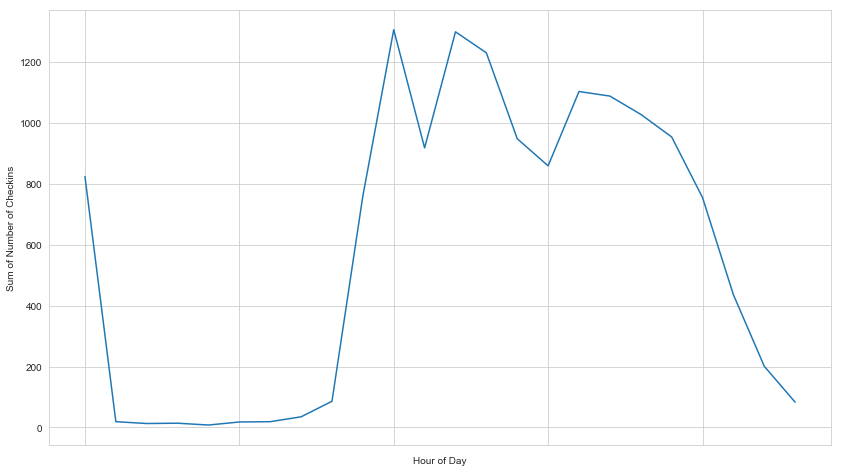

In [48]:
fig, ax = plt.subplots(figsize = (14,8))
gordon_checkin.groupby(['hour'])['checkins'].sum().plot()
plt.xlabel('Hour of Day')
plt.ylabel('Sum of Number of Checkins')

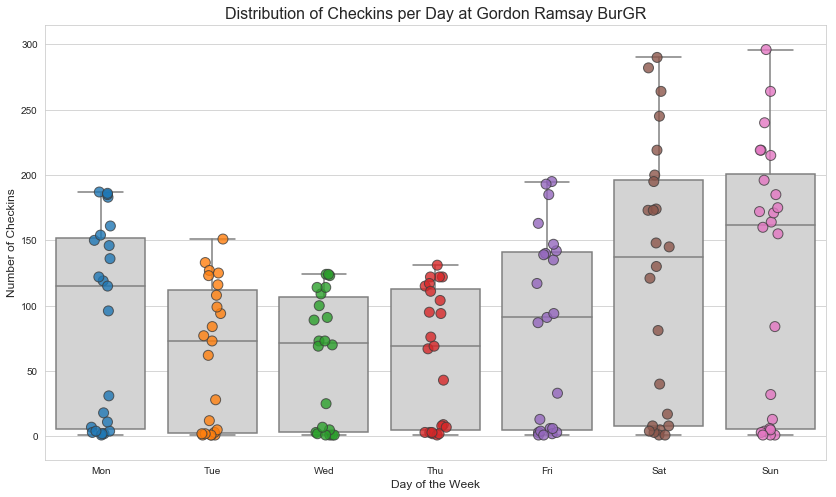

In [49]:
fig, ax = plt.subplots(figsize = (14,8))

sns.boxplot(x='weekday', y='checkins', data=gordon_checkin, color='lightgray')
sns.stripplot(x='weekday', y='checkins', data=gordon_checkin, alpha=0.8, jitter=True, size=10, linewidth=1)
plt.title('Distribution of Checkins per Day at Gordon Ramsay BurGR', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Checkins', fontsize=12)

#fig.savefig('Gordon_Ramsay_Checkin.png')

Let's now compare breakdown of checkins for Gordon Ramsay BurGR and rest of the Vegas Strip restaurants with 5 stars.

In [50]:
vegas = list(df[(df.city == "Las Vegas") & (df.neighborhood == 'The Strip') & (df.rev_stars == 5)].business_id)
vegas_checkins = df_check[df_check.business_id.isin(vegas)]
vegas_checkins['weekday'] = pd.Categorical(vegas_checkins['weekday'],
                                           categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                           ordered=True)

(-2, 60)

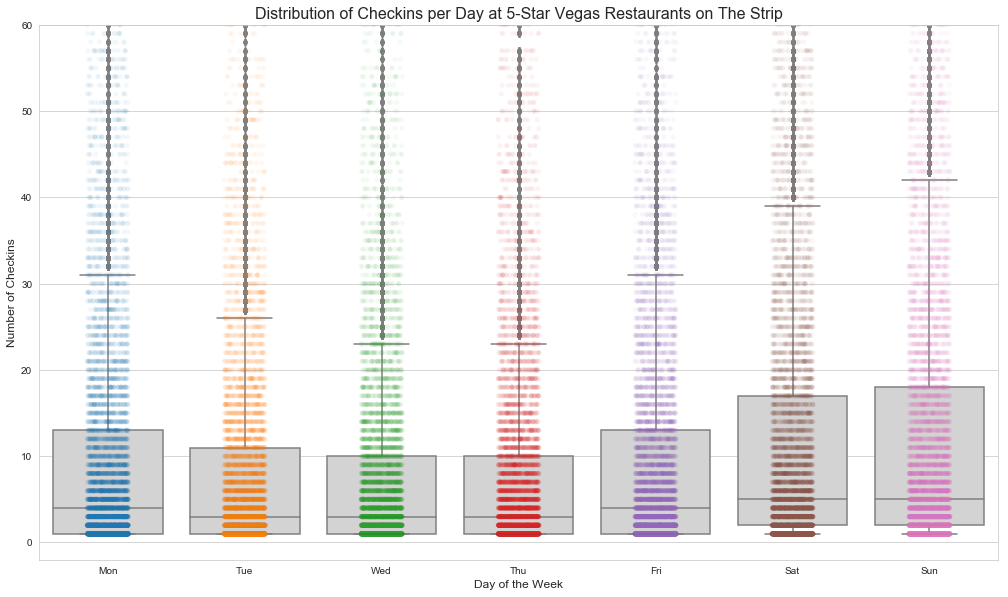

In [52]:
#how do all other restaurants on The Strip in Las Vegas compare?
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.boxplot(x='weekday', y='checkins', data=vegas_checkins, color='lightgray')
sns.stripplot(x='weekday', y='checkins', data=vegas_checkins, alpha=0.05, jitter=.15, size=5)
plt.title('Distribution of Checkins per Day at 5-Star Vegas Restaurants on The Strip', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Checkins', fontsize=12)
plt.ylim(-2, 60)

#fig.savefig('Vegas_Strip_Checkin.png')

### Timeseries

In [53]:
#Let's add a few columns to our Gordon dataframe
gordon_all['year'] = gordon_all.date.apply(lambda x: x.year)
gordon_all['week'] = gordon_all.date.apply(lambda x: x.week)
gordon_all.head()

,date,user_id,rev_stars,useful,funny,cool,text length,year,week
172674,2013-08-18,0YBJMg4H0SGqYZbZTxnSOg,4,0,0,0,958,2013,33
172822,2015-10-23,D9FTLv0yW469_OrVMH4t-Q,5,0,0,1,86,2015,43
172854,2014-02-17,ltf9Hx604T5OjJ2jJ44BBg,1,1,0,0,383,2014,8
172897,2016-05-11,FsUSrlL2-W3XsxmOctc9YA,3,1,1,2,471,2016,19
172961,2017-01-02,Ws70fVeBQnHOFJ-xzJoMnQ,1,0,2,0,411,2017,1


In [55]:
#Now let's take a look at the distribution of only good reviews to see if we can find any spikes 
reviews = pd.DataFrame(gordon_all.groupby(['year', 'week', 'rev_stars']).size()).reset_index()
reviews.head(10)

,year,week,rev_stars,0
0,2012,1,1,4
1,2012,51,5,1
2,2012,52,1,1
3,2012,52,2,1
4,2012,52,4,4
5,2012,52,5,5
6,2013,1,1,1
7,2013,1,3,2
8,2013,1,4,7
9,2013,1,5,8


In [56]:
reviews_good = reviews[(reviews.rev_stars >= 4) & (reviews.year == 2015)]
reviews_good.head()

,year,week,rev_stars,0
469,2015,1,4,6
470,2015,1,5,8
474,2015,2,4,10
475,2015,2,5,10
479,2015,3,4,6


Text(0.5, 1.0, '2015 Distribution of 4 & 5 Star Ratings for Gordon Ramsay BurGR')

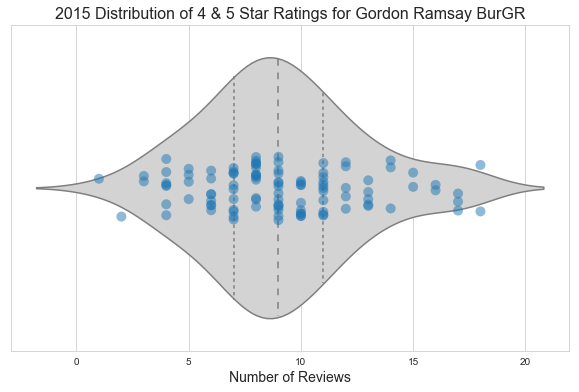

In [57]:
fig, ax = plt.subplots(figsize = (10,6))
sns.violinplot(reviews_good[0], color='lightgray', inner='quartile')
sns.stripplot(reviews_good[0], size=10, alpha=0.5)
plt.xlabel('Number of Reviews', fontsize=14)
plt.title('2015 Distribution of 4 & 5 Star Ratings for Gordon Ramsay BurGR', fontsize=16)
#fig.savefig('High_Rtng_dist_GRB.png')

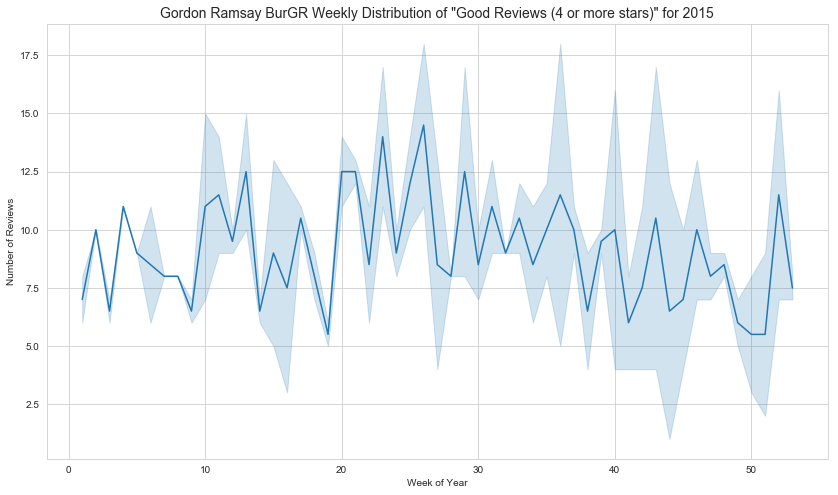

In [58]:
fig, ax = plt.subplots(figsize = (14,8))

sns.lineplot(x='week', y=0, data=reviews_good)

plt.title('Gordon Ramsay BurGR Weekly Distribution of "Good Reviews (4 or more stars)" for 2015', fontsize=14)
plt.ylabel('Number of Reviews')
plt.xlabel('Week of Year')
#fig.savefig('Review_Pattern.png')

In [59]:
gordon_all['weekday'] = gordon_all.date.apply(lambda x: x.weekday())

(1, 5)

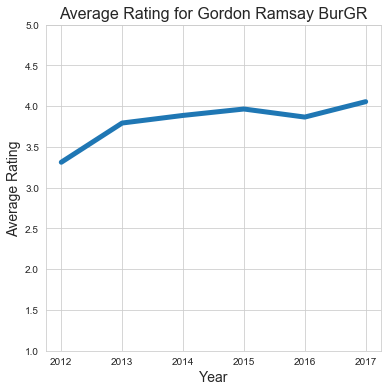

In [60]:
fig, ax = plt.subplots(figsize = (6,6))

gordon_all.groupby(['year'])['rev_stars'].mean().plot(linewidth=5)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating for Gordon Ramsay BurGR',fontsize=16)
plt.ylim(1,5)

#fig.savefig('Ave_Rtng_GRB.png')

Text(0.5, 1.0, 'Distribution Star Ratings Over the Years for Gordon Ramsay BurGR')

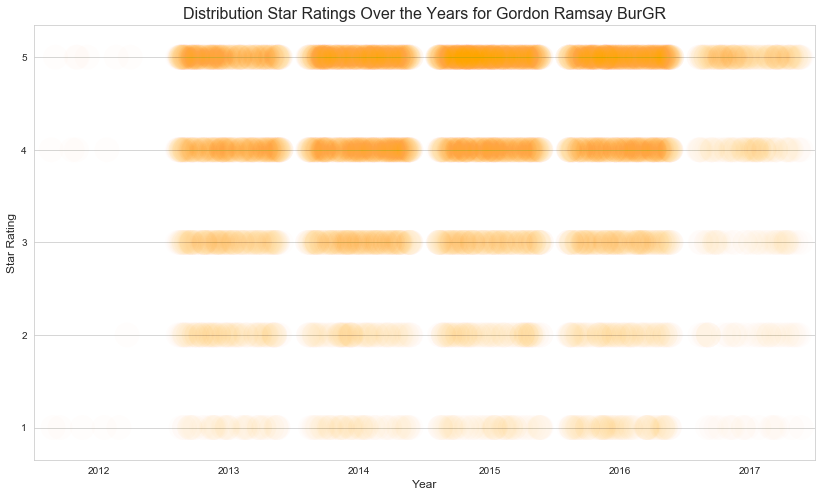

In [61]:
fig, ax = plt.subplots(figsize = (14,8))

sns.stripplot(x='year', y='rev_stars', data=gordon_all, alpha=0.01, 
              jitter=0.4, size=25, color='orange')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Star Rating', fontsize=12)

plt.title('Distribution Star Ratings Over the Years for Gordon Ramsay BurGR', fontsize=16)
#fig.savefig('Star_Distribution_Gordon.png')

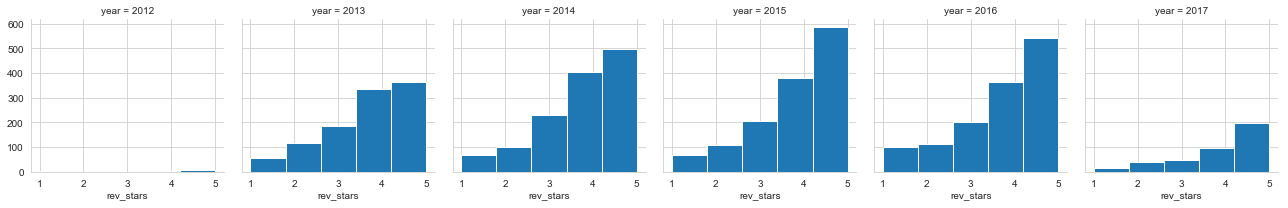

In [62]:
g = sns.FacetGrid(data=gordon_all, col='year')
g.map(plt.hist, 'rev_stars', bins=5)

## Users and their friends

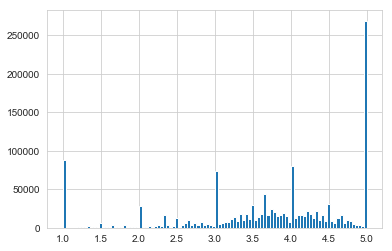

In [63]:
df_friends = pd.read_csv(f'{path}/external/yelp_user.csv', parse_dates=['yelping_since'])
df_friends.average_stars.hist(bins=100)

In [64]:
df_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


In [65]:
#Let's replace all the 'None' strings with NaN so we can drop the users without friends
df_friends['friends'] = df_friends.friends.apply(lambda x: np.nan if x == 'None' else x)
df_with_friends = df_friends.dropna()
df_with_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
17,h5ERTYn2vQ1QbjTZvfWPaA,Bobby,3,2017-01-07,"jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...",0,0,0,0,None,3.33,0,0,0,0,0,0,0,0,0,0,0
18,jYnkJR3T8yCERXywoVhWYA,Hugo,48,2010-07-06,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...",15,6,2,3,None,3.73,2,0,0,0,0,1,1,1,1,2,0
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,3.96,2,4,0,0,0,9,7,7,7,4,0
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1


In [66]:
df_with_friends['num_friends'] = df_with_friends.friends.apply(lambda x: x.count(',') + 1)
df_with_friends['year'] = df_with_friends.yelping_since.apply(lambda x: x.year)

##### A Dataframe containing only users with friends

In [67]:
df_with_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,num_friends,year
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0,79,2013
17,h5ERTYn2vQ1QbjTZvfWPaA,Bobby,3,2017-01-07,"jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...",0,0,0,0,None,3.33,0,0,0,0,0,0,0,0,0,0,0,64,2017
18,jYnkJR3T8yCERXywoVhWYA,Hugo,48,2010-07-06,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...",15,6,2,3,None,3.73,2,0,0,0,0,1,1,1,1,2,0,263,2010
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,3.96,2,4,0,0,0,9,7,7,7,4,0,100,2007
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1,332,2008


In [68]:
df_with_friends.average_stars.mean()

3.7954295134167597

In [69]:
#remove users with less than 10 friends
df_with_friends.drop(df_with_friends[df_with_friends.review_count < 10].index, inplace=True)

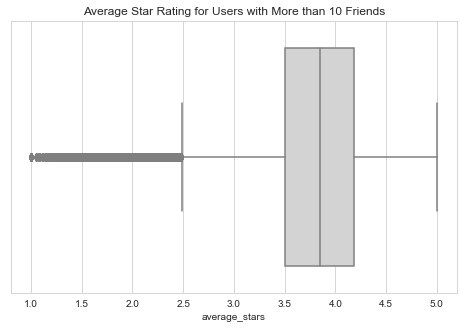

In [70]:
fig, ax = plt.subplots(figsize = (8,5))

sns.boxplot(x='average_stars', data=df_with_friends, color='lightgray')
plt.title('Average Star Rating for Users with More than 10 Friends')

#fig.savefig('Users_with_friends.png')

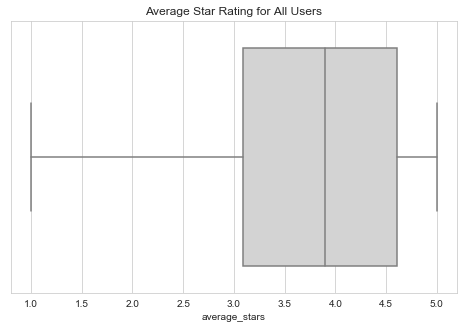

In [71]:
fig, ax = plt.subplots(figsize = (8,5))

sns.boxplot(x='average_stars', data=df_friends, color='lightgray')
plt.title('Average Star Rating for All Users')

#fig.savefig('All_users.png')

Text(0.5, 0, 'Number of Friends')

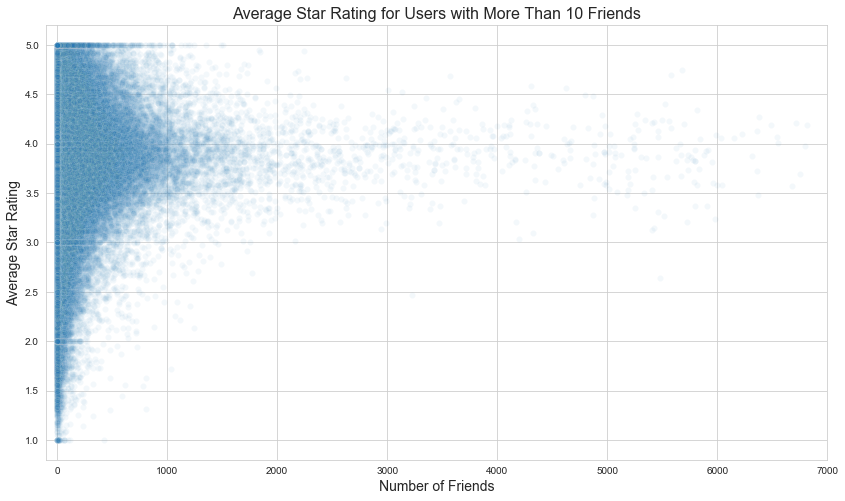

In [72]:
fig, ax = plt.subplots(figsize = (14,8))

sns.scatterplot(#x=np.log(df_friends.num_friends),
                x='num_friends', 
                y='average_stars', data=df_with_friends, alpha=0.05)
plt.xlim(-100,7000)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Friends', fontsize=14)
#fig.savefig('Users_with_friends_scatter.png')

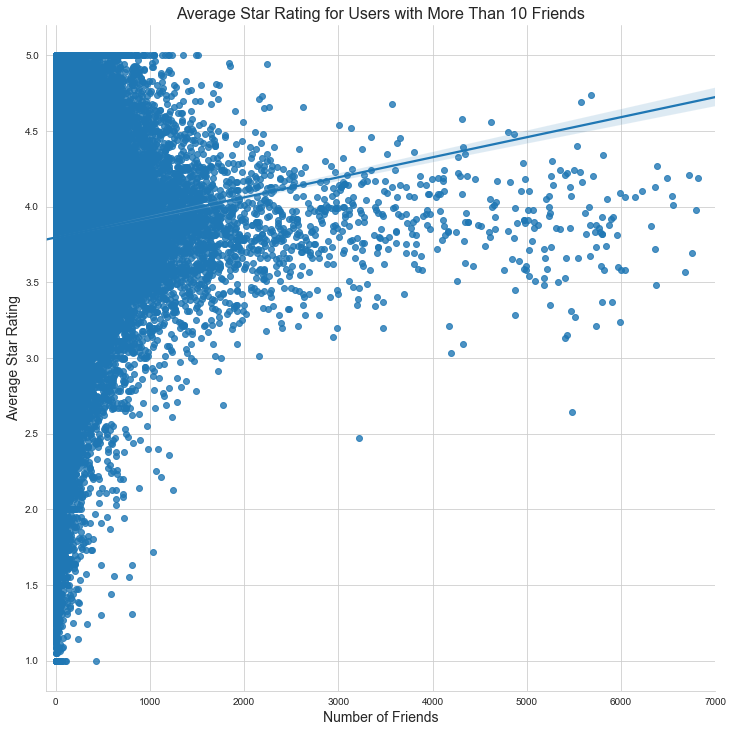

In [73]:
sns.lmplot(x='num_friends', y='average_stars', fit_reg=True, data=df_with_friends,
          height=10, aspect=1.0)
plt.xlim(-100,7000)
plt.ylim(0.8,5.2)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Friends', fontsize=14)
plt.show()

Text(0.5, 0, 'Number of Reviews')

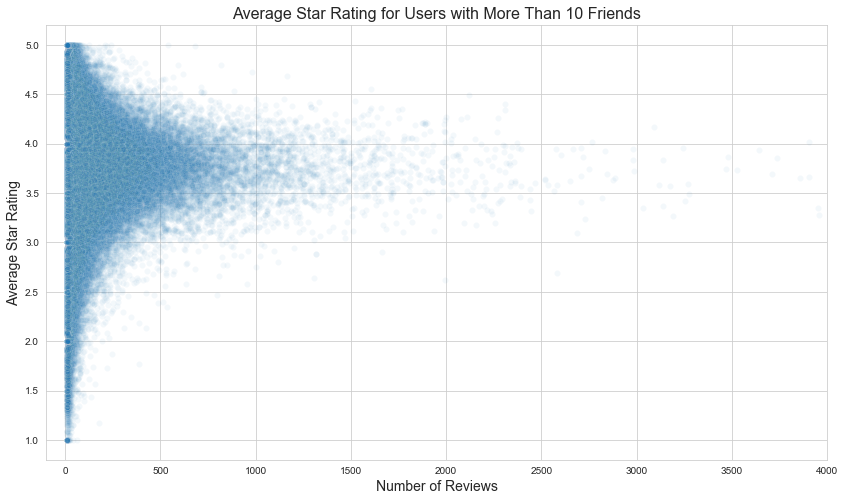

In [74]:
fig, ax = plt.subplots(figsize = (14,8))

sns.scatterplot(x='review_count', y='average_stars', data=df_with_friends, alpha=0.05)
plt.xlim(-100, 4000)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)

#fig.savefig('Average_review_scatter.png')

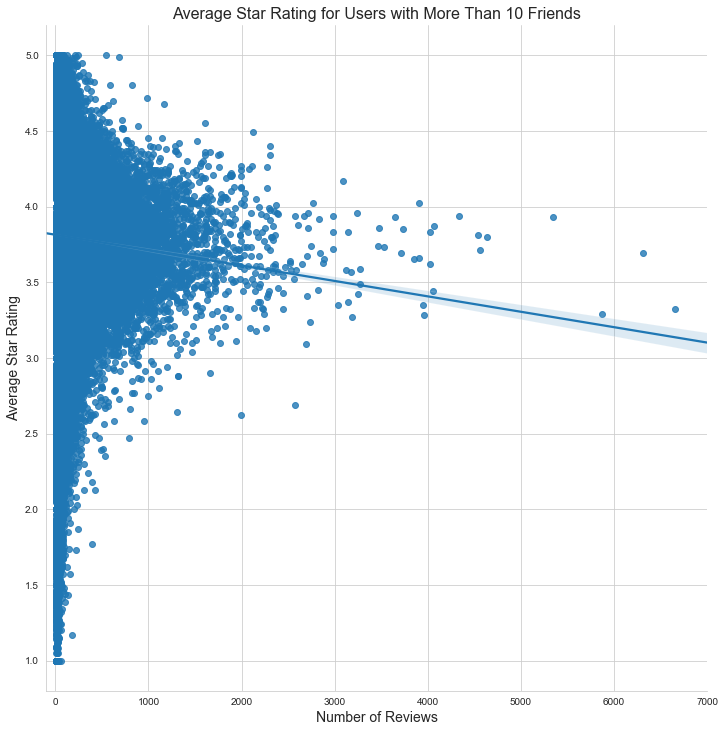

In [75]:
sns.lmplot(x='review_count', y='average_stars', fit_reg=True, data=df_with_friends,
          height=10, aspect=1.0)
plt.xlim(-100,7000)
plt.ylim(0.8,5.2)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)
plt.show()

Text(0.5, 52.0, 'Number of Friends (Log)')

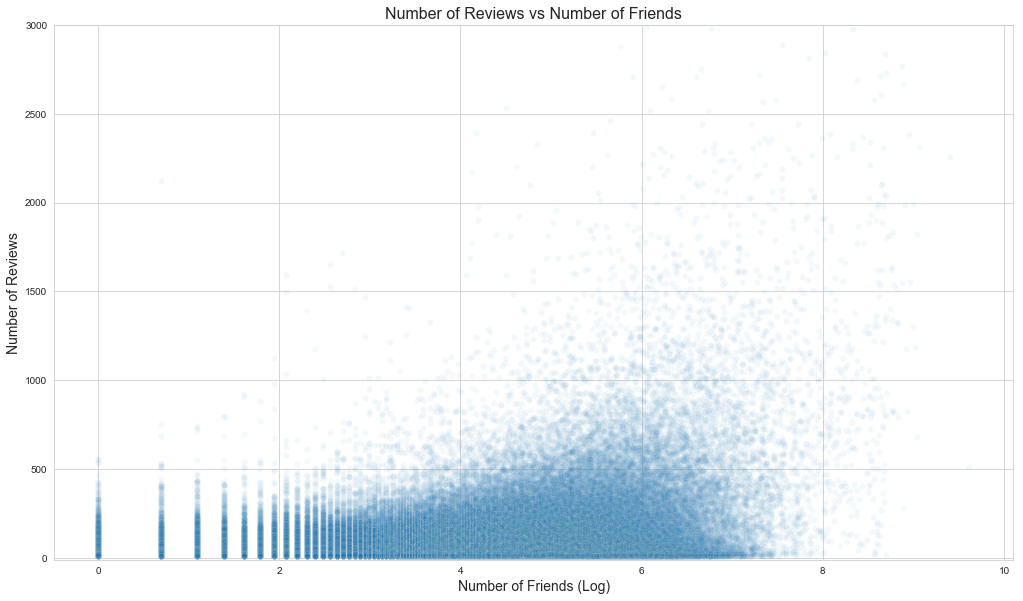

In [76]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.scatterplot(x=np.log(df_with_friends.num_friends), y='review_count', data=df_with_friends, alpha=0.05)
plt.ylim(-10,3000)
plt.title('Number of Reviews vs Number of Friends', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xlabel('Number of Friends (Log)', fontsize=14)

## Tips Dataset

In [78]:
df_tips = pd.read_csv(f'{path}/external/yelp_tip.csv', parse_dates=['date'])
df_tips.head()

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


In [79]:
print('==========TIPS=========')
print(f'Number of Users: {df_tips.user_id.unique().shape[0]}')
print(f'Number of Restaurants: {df_tips.business_id.unique().shape[0]}')
print(f'Number of Reviews: {df_tips.text.unique().shape[0]}')

==========TIPS=========
Number of Users: 271679
Number of Restaurants: 112365
Number of Reviews: 1032860


In [80]:
scott_biz = list(df[df.city == 'Scottsdale'].business_id.unique())

In [82]:
#and now let's only keep the businesses that are in the scottsdale dataframe
df_tips_scott = df_tips[df_tips.business_id.isin(scott_biz)]

In [83]:
print('==========TIPS AFTER FILTERING BUSINESSES=========')
print(f'Number of Users: {df_tips_scott.user_id.unique().shape[0]}')
print(f'Number of Restaurants: {df_tips_scott.business_id.unique().shape[0]}')
print(f'Number of Reviews: {df_tips_scott.text.unique().shape[0]}')

==========TIPS AFTER FILTERING BUSINESSES=========
Number of Users: 16192
Number of Restaurants: 1178
Number of Reviews: 35943


Almost every restaurant in our Scottsdale dataset has a tip

In [84]:
df_tips_scott.head()

,text,date,likes,business_id,user_id
35,closed closed closed closed closed closed clos...,2012-03-28,0,Xmndl6GoZg8taEUlwQMYxg,TvkqJ8YEIsTb16RnnrNyfQ
49,"I didn't eat here, but they were nice enough t...",2012-03-28,0,HWjqW5ZFJ8eZRQuHcpySQA,TvkqJ8YEIsTb16RnnrNyfQ
1810,"I've been missing good sushi, it's time!",2010-12-30,0,QS3QxI7u5PRdtbGgI0-UsA,PAeEkjrXTub0ENa4rZiWvA
1811,Enjoying date night with Kate.,2012-02-22,0,QS3QxI7u5PRdtbGgI0-UsA,PAeEkjrXTub0ENa4rZiWvA
1812,"Great sushi lunch special - board, soup and sa...",2013-06-27,0,QS3QxI7u5PRdtbGgI0-UsA,PAeEkjrXTub0ENa4rZiWvA


In [85]:
df_tips_scott.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37051 entries, 35 to 1098295
Data columns (total 5 columns):
text           37051 non-null object
date           37051 non-null datetime64[ns]
likes          37051 non-null int64
business_id    37051 non-null object
user_id        37051 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [86]:
df_tips_scott.groupby(['business_id','text']).size()[0:5]

business_id             text                                                                       
-01XupAWZEXbdNbxNg5mEg  Bartender nasty... No manners & bad service. :(   Too busy texting             1
                        Check sandwich for plastic bread ties before eating.  Yeah not happy camper    1
                        Come early to get a spot by the glass. Kids will love it.                      1
                        Come for HH!!                                                                  1
                        Coyotes!                                                                       1
dtype: int64

## Business Attributes Dataset

In [87]:
df_att = pd.read_csv(f'{path}/external/yelp_business_attributes.csv')
df_att.head()

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,...,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [88]:
df_att.columns

Index(['business_id', 'AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'Restau

In [89]:
rest_att = df_att[['business_id',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups',
       'Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'GoodForDancing', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'CoatCheck', 'Smoking', 'DriveThru', 'DogsAllowed',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService']]

In [90]:
#filter for Scottsdale restaurants
scott_att = rest_att[rest_att.business_id.isin(scott_biz)]

In [91]:
scott_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 92 to 152001
Columns: 72 entries, business_id to RestaurantsCounterService
dtypes: object(72)
memory usage: 747.1+ KB


In [92]:
scott_att.head()

,business_id,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,...,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
92,VdlPZg2NAu8t8GkdbPLecg,Na,Na,False,False,False,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,False,False,False,True,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,True,True,False,True,True,True,Na
196,Qv0OEziLJwyAqcgtrTsA4w,Na,Na,False,False,False,True,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
359,tCJGEQVqjELLYv3fPNX5Rw,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
365,rv9T1qGHbh9eXqFpKEPy_A,Na,Na,False,False,False,True,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
496,LPq-IOpA_VrZ2xRh1A6Ssw,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
